#### Pandas Tutorial - Part 47

This notebook covers various Series methods including:
- Standard error of the mean with `sem()`
- Setting axis labels with `set_axis()`
- Shifting data with `shift()`

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

##### Standard Error of the Mean

The `sem()` method calculates the standard error of the mean of a Series.

In [4]:
# Create a Series with sample data
s = pd.Series([1, 2, 3, 4, 5, 6, 7, 8, 9, 10])
print("Sample data:")
print(s)

Sample data:
0     1
1     2
2     3
3     4
4     5
5     6
6     7
7     8
8     9
9    10
dtype: int64


In [5]:
# Calculate the mean
mean = s.mean()
print(f"Mean: {mean}")

Mean: 5.5


In [6]:
# Calculate the standard deviation
std = s.std()
print(f"Standard deviation: {std}")

Standard deviation: 3.0276503540974917


In [7]:
# Calculate the standard error of the mean
sem = s.sem()
print(f"Standard error of the mean: {sem}")

Standard error of the mean: 0.9574271077563381


In [8]:
# Verify the calculation: SEM = std / sqrt(n)
manual_sem = s.std() / np.sqrt(len(s))
print(f"Manually calculated SEM: {manual_sem}")

Manually calculated SEM: 0.9574271077563381


In [9]:
# Create a Series with missing values
s_with_nan = pd.Series([1, 2, 3, np.nan, 5, 6, np.nan, 8, 9, 10])
print("Series with missing values:")
print(s_with_nan)

Series with missing values:
0     1.0
1     2.0
2     3.0
3     NaN
4     5.0
5     6.0
6     NaN
7     8.0
8     9.0
9    10.0
dtype: float64


In [10]:
# Calculate SEM with skipna=True (default)
sem_skipna = s_with_nan.sem()
print(f"SEM with skipna=True: {sem_skipna}")

SEM with skipna=True: 1.1801936887041646


In [11]:
# Calculate SEM with skipna=False
sem_no_skipna = s_with_nan.sem(skipna=False)
print(f"SEM with skipna=False: {sem_no_skipna}")

SEM with skipna=False: nan


In [12]:
# Calculate SEM with different ddof values
sem_ddof0 = s.sem(ddof=0)
sem_ddof1 = s.sem(ddof=1)  # default
sem_ddof2 = s.sem(ddof=2)

print(f"SEM with ddof=0: {sem_ddof0}")
print(f"SEM with ddof=1 (default): {sem_ddof1}")
print(f"SEM with ddof=2: {sem_ddof2}")

SEM with ddof=0: 0.9082951062292475
SEM with ddof=1 (default): 0.9574271077563381
SEM with ddof=2: 1.015504800579495


##### Setting Axis Labels

The `set_axis()` method assigns desired labels to a given axis.

In [13]:
# Create a Series
s = pd.Series([1, 2, 3])
print("Original Series:")
print(s)

Original Series:
0    1
1    2
2    3
dtype: int64


In [14]:
# Set new axis labels
s_new_labels = s.set_axis(['a', 'b', 'c'], axis=0)
print("Series with new labels:")
print(s_new_labels)

Series with new labels:
a    1
b    2
c    3
dtype: int64


In [15]:
# Set new axis labels in-place
s_inplace = s.copy()
# Use the correct approach for in-place label change
s_inplace.index = ['x', 'y', 'z']
print("Series after in-place label change:")
print(s_inplace)

Series after in-place label change:
x    1
y    2
z    3
dtype: int64


In [16]:
# Create a DataFrame
df = pd.DataFrame({"A": [1, 2, 3], "B": [4, 5, 6]})
print("Original DataFrame:")
print(df)

Original DataFrame:
   A  B
0  1  4
1  2  5
2  3  6


In [17]:
# Change row labels
df_row_labels = df.set_axis(['a', 'b', 'c'], axis='index')
print("DataFrame with new row labels:")
print(df_row_labels)

DataFrame with new row labels:
   A  B
a  1  4
b  2  5
c  3  6


In [18]:
# Change column labels
df_col_labels = df.set_axis(['I', 'II'], axis='columns')
print("DataFrame with new column labels:")
print(df_col_labels)

DataFrame with new column labels:
   I  II
0  1   4
1  2   5
2  3   6


In [20]:
# Change column labels in-place
df_inplace = df.copy()
# Use the correct approach for in-place column label change
df_inplace.columns = ['X', 'Y']
print("DataFrame after in-place column label change:")
print(df_inplace)

DataFrame after in-place column label change:
   X  Y
0  1  4
1  2  5
2  3  6


##### Shifting Data

The `shift()` method shifts the index by a desired number of periods.

In [21]:
# Create a Series
s = pd.Series([1, 2, 3, 4, 5])
print("Original Series:")
print(s)

Original Series:
0    1
1    2
2    3
3    4
4    5
dtype: int64


In [22]:
# Shift data by 1 period (default)
s_shift1 = s.shift()
print("Series shifted by 1 period:")
print(s_shift1)

Series shifted by 1 period:
0    NaN
1    1.0
2    2.0
3    3.0
4    4.0
dtype: float64


In [23]:
# Shift data by 2 periods
s_shift2 = s.shift(periods=2)
print("Series shifted by 2 periods:")
print(s_shift2)

Series shifted by 2 periods:
0    NaN
1    NaN
2    1.0
3    2.0
4    3.0
dtype: float64


In [24]:
# Shift data backward by 1 period
s_shift_neg1 = s.shift(periods=-1)
print("Series shifted backward by 1 period:")
print(s_shift_neg1)

Series shifted backward by 1 period:
0    2.0
1    3.0
2    4.0
3    5.0
4    NaN
dtype: float64


In [25]:
# Shift with a custom fill value
s_shift_fill = s.shift(periods=2, fill_value=0)
print("Series shifted by 2 periods with fill_value=0:")
print(s_shift_fill)

Series shifted by 2 periods with fill_value=0:
0    0
1    0
2    1
3    2
4    3
dtype: int64


In [26]:
# Create a Series with datetime index
date_s = pd.Series([1, 2, 3, 4], index=pd.date_range('2023-01-01', periods=4))
print("Series with datetime index:")
print(date_s)

Series with datetime index:
2023-01-01    1
2023-01-02    2
2023-01-03    3
2023-01-04    4
Freq: D, dtype: int64


In [27]:
# Shift with frequency
date_s_freq = date_s.shift(periods=1, freq='D')
print("Series shifted by 1 day:")
print(date_s_freq)

Series shifted by 1 day:
2023-01-02    1
2023-01-03    2
2023-01-04    3
2023-01-05    4
Freq: D, dtype: int64


In [28]:
# Shift with different frequencies
print("Series shifted by 2 days:")
print(date_s.shift(periods=2, freq='D'))

print("\nSeries shifted by 1 week:")
print(date_s.shift(periods=1, freq='W'))

print("\nSeries shifted by 1 month:")
print(date_s.shift(periods=1, freq='M'))

Series shifted by 2 days:
2023-01-03    1
2023-01-04    2
2023-01-05    3
2023-01-06    4
Freq: D, dtype: int64

Series shifted by 1 week:
2023-01-08    1
2023-01-08    2
2023-01-08    3
2023-01-08    4
dtype: int64

Series shifted by 1 month:
2023-01-31    1
2023-01-31    2
2023-01-31    3
2023-01-31    4
dtype: int64


/var/folders/7y/fzwln1_93mn3js3wyk61_6xm0000gn/T/ipykernel_78421/2146950984.py:9: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  print(date_s.shift(periods=1, freq='M'))


In [29]:
# Create a DataFrame
df = pd.DataFrame({'A': [1, 2, 3, 4], 'B': [5, 6, 7, 8]})
print("Original DataFrame:")
print(df)

Original DataFrame:
   A  B
0  1  5
1  2  6
2  3  7
3  4  8


In [30]:
# Shift all columns
df_shift = df.shift()
print("DataFrame with all columns shifted:")
print(df_shift)

DataFrame with all columns shifted:
     A    B
0  NaN  NaN
1  1.0  5.0
2  2.0  6.0
3  3.0  7.0


In [31]:
# Shift only one column
df_col_shift = df.copy()
df_col_shift['A'] = df_col_shift['A'].shift()
print("DataFrame with only column A shifted:")
print(df_col_shift)

DataFrame with only column A shifted:
     A  B
0  NaN  5
1  1.0  6
2  2.0  7
3  3.0  8


##### Applications of Shifting Data

Shifting data is particularly useful for time series analysis and calculating differences or percentage changes.

In [32]:
# Create a Series with stock prices
stock_prices = pd.Series([100, 102, 104, 103, 105, 107, 108], 
                         index=pd.date_range('2023-01-01', periods=7))
print("Stock prices:")
print(stock_prices)

Stock prices:
2023-01-01    100
2023-01-02    102
2023-01-03    104
2023-01-04    103
2023-01-05    105
2023-01-06    107
2023-01-07    108
Freq: D, dtype: int64


In [33]:
# Calculate daily price difference
daily_diff = stock_prices - stock_prices.shift(1)
print("Daily price difference:")
print(daily_diff)

Daily price difference:
2023-01-01    NaN
2023-01-02    2.0
2023-01-03    2.0
2023-01-04   -1.0
2023-01-05    2.0
2023-01-06    2.0
2023-01-07    1.0
Freq: D, dtype: float64


In [34]:
# Calculate daily percentage change
daily_pct_change = stock_prices.pct_change()
print("Daily percentage change:")
print(daily_pct_change)

Daily percentage change:
2023-01-01         NaN
2023-01-02    0.020000
2023-01-03    0.019608
2023-01-04   -0.009615
2023-01-05    0.019417
2023-01-06    0.019048
2023-01-07    0.009346
Freq: D, dtype: float64


In [35]:
# Calculate moving average
def moving_average(data, window):
    return data.rolling(window=window).mean()

ma3 = moving_average(stock_prices, 3)
print("3-day moving average:")
print(ma3)

3-day moving average:
2023-01-01           NaN
2023-01-02           NaN
2023-01-03    102.000000
2023-01-04    103.000000
2023-01-05    104.000000
2023-01-06    105.000000
2023-01-07    106.666667
Freq: D, dtype: float64


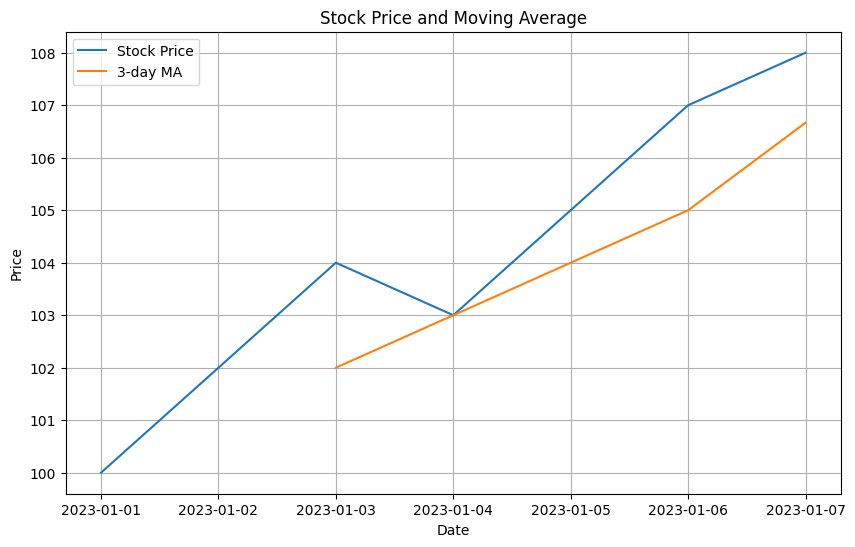

In [36]:
# Plot stock prices and moving average
plt.figure(figsize=(10, 6))
plt.plot(stock_prices.index, stock_prices, label='Stock Price')
plt.plot(ma3.index, ma3, label='3-day MA')
plt.title('Stock Price and Moving Average')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.show()

##### Conclusion

In this notebook, we've explored various Series methods in pandas:

1. Standard error of the mean with `sem()`, which calculates the standard error of the mean of a Series with options for handling missing values and degrees of freedom.
2. Setting axis labels with `set_axis()`, which assigns new labels to a given axis in a Series or DataFrame.
3. Shifting data with `shift()`, which shifts the index by a desired number of periods with options for custom fill values and frequency.

We also explored practical applications of shifting data, such as calculating differences, percentage changes, and moving averages, which are particularly useful for time series analysis.

These methods are essential tools for data manipulation and analysis in pandas, allowing for flexible and powerful operations on your data.